# **Laboratorio 2**

**Integrantes**


**Estudiante 1:**
Juan Miguel Manrique - 202021447

**Estudiante 2:**
Andrés Felipe Gómez García - 202021189

**Estudiante 3:**
Sebastian Contreras Salazar - 202020903

# 1. Preparación de datos

## Exploración Inicial

Para empezar con la preparación de los datos, se revisarán las distribuciones de las variables numéricas y categóricas principales del dataset. Esto, con el objetivo de detectar valores atípicos o desbalanceos antes del análisis del modelo.

### Carga de datos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cargar datos
df = pd.read_csv('data/Datos_senecaféAlpes.csv', sep=';')

# dimensiones del dataframe
print("Dimensiones del DataFrame:", df.shape)

# primeras 5 registros
display(df.head())

Dimensiones del DataFrame: (14291, 19)


ID   Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  \
0  G006149  50836   923618.0        358.515147        181.388899   
1  G007234  62764  1003767.0        409.207082        198.330199   
2  G007054  59965   994266.0        389.088529        197.967275   
3  G006619  55035      917.6        379.346822        185.390577   
4  G013353  39324   737773.0        262.520242        191.176858   

  RelacionAspecto  Excentricidad  AreaConvexa  DiametroEquivalente    Medida  \
0        alargado            NaN          NaN           254.413847  0.804762   
1        Alargado            NaN      64158.0           282.689948  0.703995   
2        Alargado       0.860886      60910.0           276.314692  0.661581   
3        Alargado       0.872446      55591.0                  NaN  0.799695   
4        Alargado       0.685326      39758.0           223.760747  0.775392   

    Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  FactorForma3  \
0  0.983840  0.748853    0.709632      0.007052      0.001103      0.503578   
1  0.978272  0.782807    0.690824      0.006520      0.000916      0.477237   
2  0.984485  0.762259    0.710159      0.006489      0.001018      0.504326   
3  0.989998  0.821376    0.697811      0.006893      0.001008      0.486941   
4  0.989084  0.907867    0.852356      0.006676      0.002174      0.726511   

   FactorForma4 DefectoVisible MétodoSecado  
0      0.995321         Normal       Lavado  
1      0.984666            NaN      Natural  
2      0.991211         Normal      Natural  
3      0.996380         Normal       Lavado  
4      0.997630         Normal       Lavado

### Visualizaciones gráficas

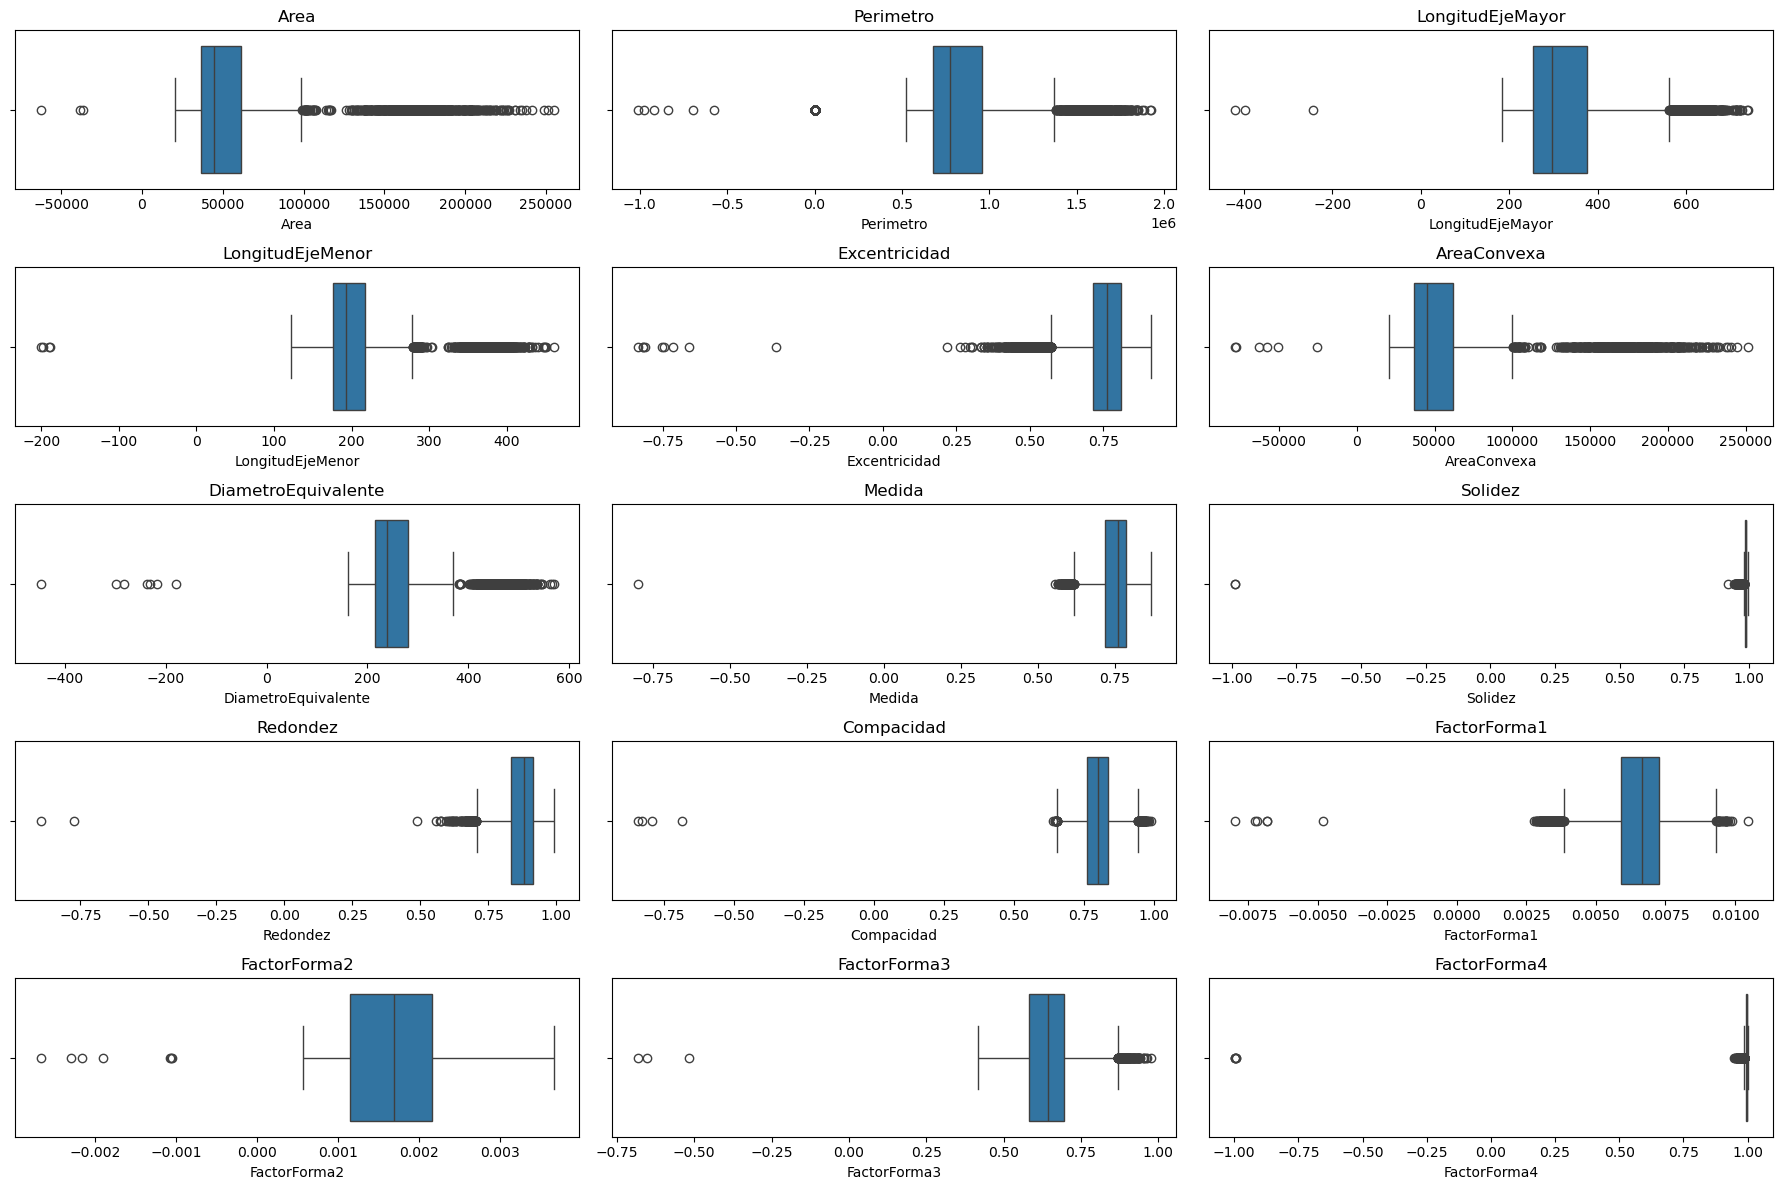

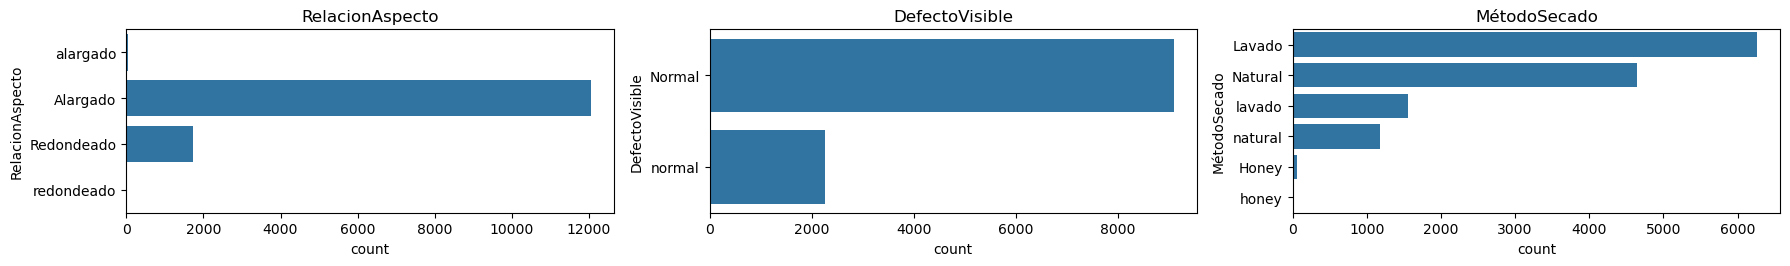

In [12]:
# Boxplot de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Plots de barras para variables categóricas, excepto 'ID'
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols[cat_cols != 'ID']  # Excluir 'ID'
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.countplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Para el caso de las variables númericas, se presentan una cantidad amplia de outliers. Para el caso de las variables categóricas, hay un desbalenceo considerable en MétodoSecado y RelaciónAspecto. A su vez, se identifica que no hay consistencia en los datos dado que hay formatos diferentes para una misma categoría. En MétodoSecado, las categorías 'lavado', 'natural' y 'honey' se repiten pero con mayúscula, al igual que en RelaciónAspecto y DefectoVisible. En la limpieza de los datos, se trataran dichas inconsistencias y se reduciran la cantidad de outliers.

## Limpieza

Para la limpieza, se realizó lo siguiente:

- Eliminación de filas duplicadas para asegurar la unicidad de los datos.
- Agregación en columna ID para asegurar la unicidad de los datos.
- Eliminación de nulos para asegurar la completitud de los datos.
- Estandarización de las variables categoricas para asegurar la consistencia de los datos.
- Manejo de outliers en variables numéricas usando el método del rango intercuartílico para asegurar la validez de los datos.

In [13]:
#Duplicidad
print("Cantidad de filas duplicadas:", df.duplicated().sum())
#Borrar duplicados
df = df.drop_duplicates()
print("Cantidad de filas duplicadas después de eliminar:", df.duplicated().sum())
print("Dimensiones del DataFrame después de eliminar duplicados:", df.shape)
print("----------------------------------")

# Unicidad por ID + consolidación
print("Cantidad de IDs únicos:", df['ID'].nunique())
print("Cantidad de filas:", df.shape[0])
print("Porcentaje de unicidad en IDs:", df['ID'].nunique() / df.shape[0] * 100, "%")

def mode_non_null(s: pd.Series):
    s = s.dropna()
    if s.empty:
        return np.nan
    m = s.mode()
    return m.iloc[0] if not m.empty else s.iloc[0]

num_cols = df.select_dtypes(include="number").columns.tolist()
if 'ID' in num_cols:
    num_cols.remove('ID')
cat_cols = [c for c in df.columns if c not in num_cols + ['ID']]

agg_dict = {c: "mean" for c in num_cols}                    # numéricas
agg_dict.update({c: mode_non_null for c in cat_cols})       # categóricas

df_agregado = (
    df.groupby('ID', as_index=False)
      .agg(agg_dict)
)
df = df_agregado.copy() 
print("Porcentaje de unicidad en IDs después de consolidar:", df['ID'].nunique() / df.shape[0] * 100, "%")
print("----------------------------------")

#Completitud de datos (revisión de nulos)
print("Cantidad de datos nulos por columna:")
print(df.isnull().sum())
#Eliminacion de nulos
df = df.dropna()
print("Cantidad de datos nulos por columna después de limpiar:")
print(df.isnull().sum())
print("Dimensiones del DataFrame después de eliminar nulos:", df.shape)
print("----------------------------------")

#Consistencia
# Estandarización de categorías en variables categóricas
df['MétodoSecado'] = df['MétodoSecado'].str.lower().str.strip()
df['RelacionAspecto'] = df['RelacionAspecto'].str.lower().str.strip()
df['DefectoVisible'] = df['DefectoVisible'].str.lower().str.strip()
print("Categorías únicas en 'MétodoSecado':", df['MétodoSecado'].unique())
print("Categorías únicas en 'RelacionAspecto':", df['RelacionAspecto'].unique())
print("Categorías únicas en 'DefectoVisible':", df['DefectoVisible'].unique())
print("----------------------------------")


# Manejo de outliers en variables numéricas usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in num_cols:
    df = remove_outliers_iqr(df, col)
    
# Validéz de datos
# Revisión de rangos en variables numéricas
for col in num_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

Cantidad de filas duplicadas: 461
Cantidad de filas duplicadas después de eliminar: 0
Dimensiones del DataFrame después de eliminar duplicados: (13830, 19)
----------------------------------
Cantidad de IDs únicos: 13611
Cantidad de filas: 13830
Porcentaje de unicidad en IDs: 98.41648590021693 %
Porcentaje de unicidad en IDs después de consolidar: 100.0 %
----------------------------------
Cantidad de datos nulos por columna:
ID                        0
Area                      0
Perimetro              1182
LongitudEjeMayor        385
LongitudEjeMenor          0
Excentricidad           564
AreaConvexa            1365
DiametroEquivalente    1825
Medida                    0
Solidez                2185
Redondez               1976
Compacidad              627
FactorForma1           1069
FactorForma2           1039
FactorForma3            455
FactorForma4           1104
RelacionAspecto         443
DefectoVisible         2781
MétodoSecado            558
dtype: int64
Cantidad de datos nulos p

Terminada la limpieza, revisamos las dimensiones del dataframe y volvemos a realizar las visualizaciones gráficas.

Dimensiones del DataFrame después de la limpieza: (2375, 19)


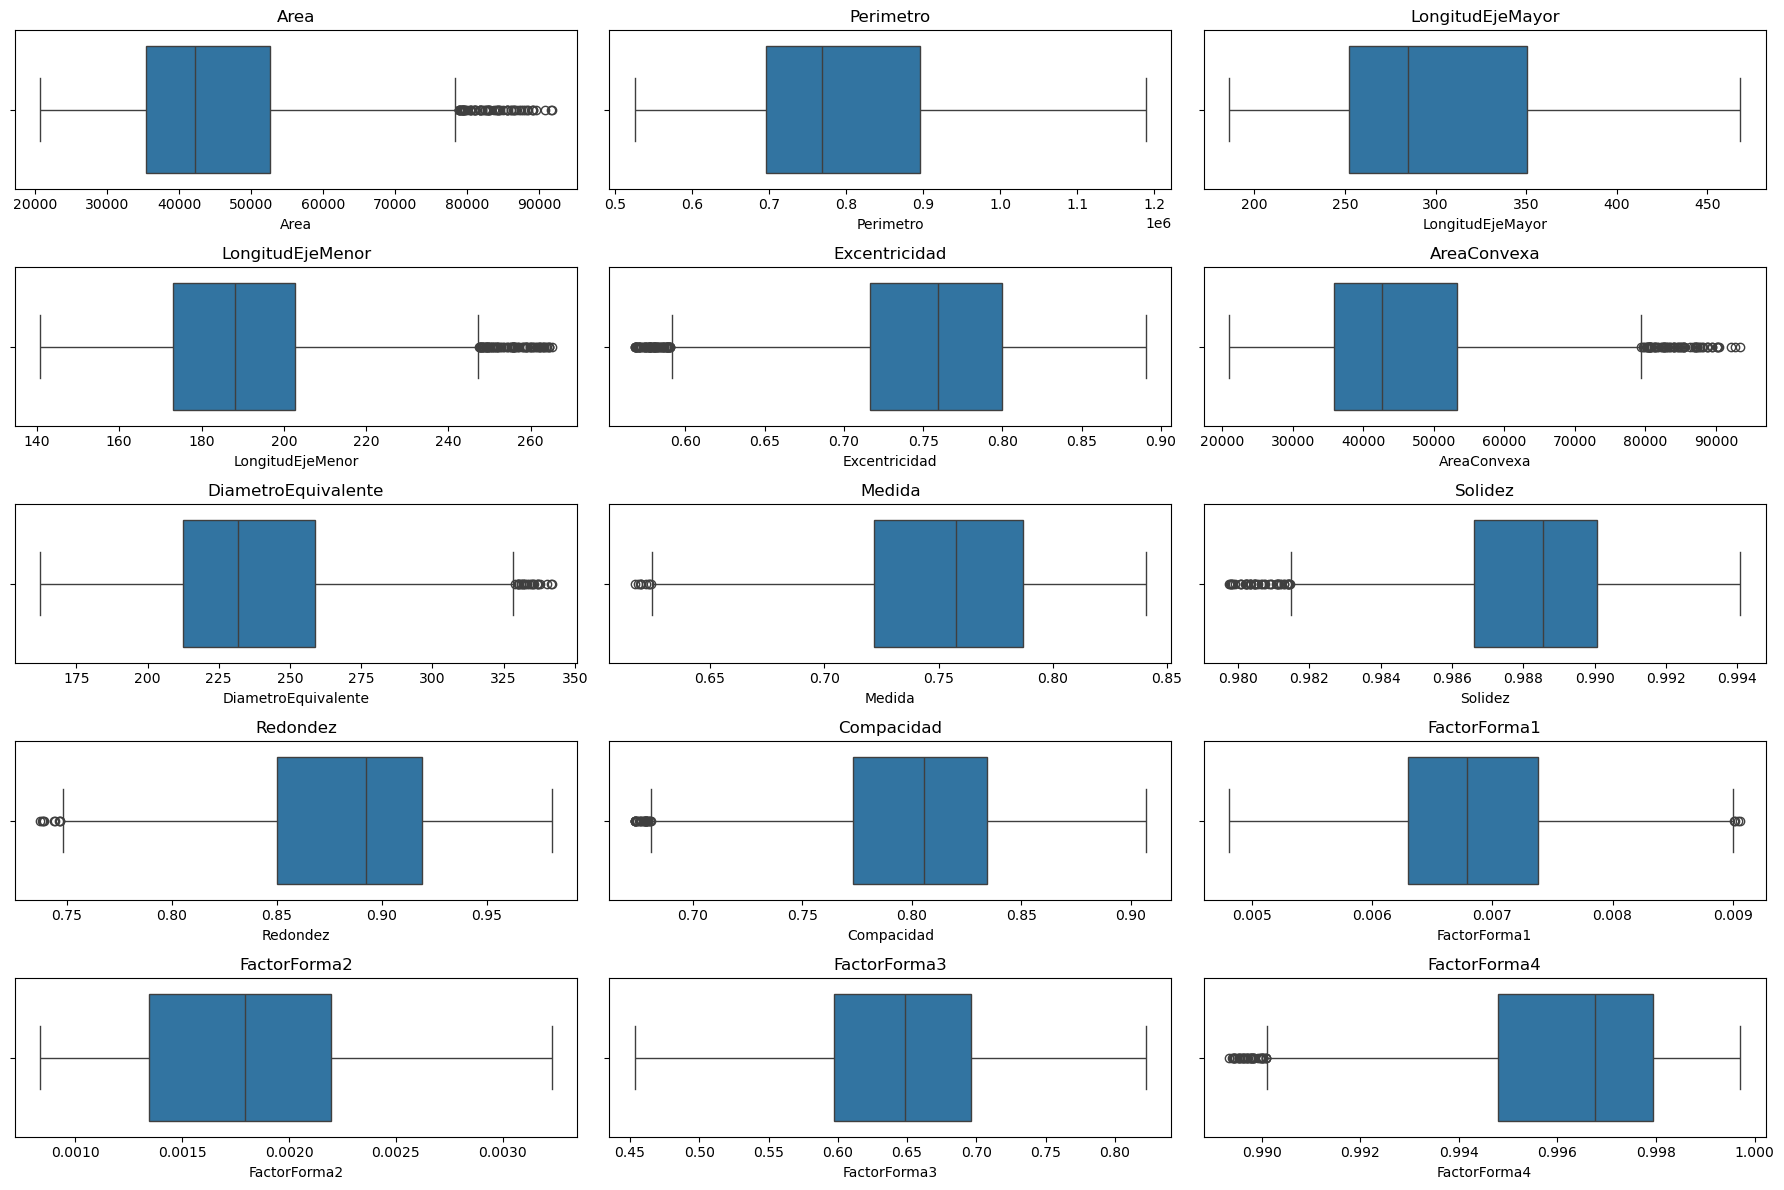

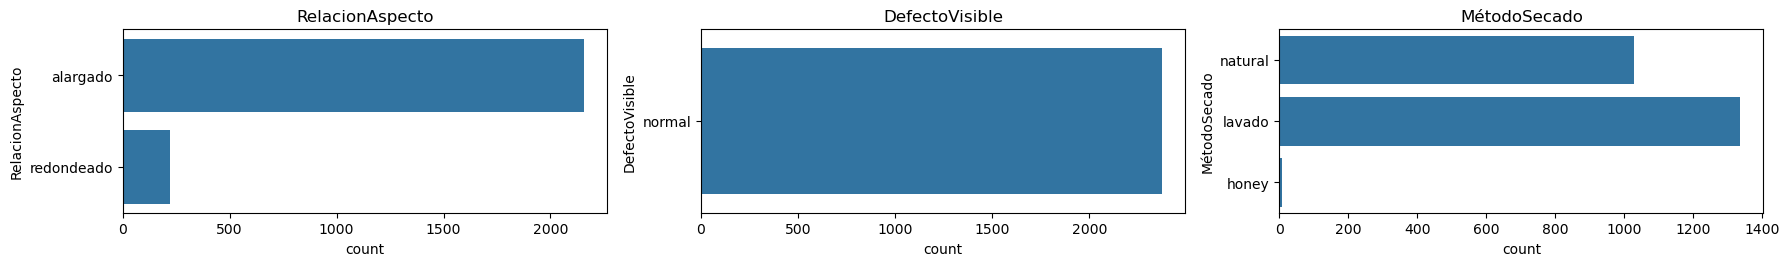

In [14]:
print("Dimensiones del DataFrame después de la limpieza:", df.shape)

# Boxplot de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Plots de barras para variables categóricas, excepto 'ID'
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols[cat_cols != 'ID']  # Excluir 'ID'
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns = 15 subplots
    sns.countplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Los histogramas son ahora consistentes, no hay variables duplicadas con formatos distintos.

## Preparación y Exploración de Grupos

Antes de agrupar, conviene intuir si existen separaciones naturales entre granos según sus atributos morfológicos.

Se realizarán algunas visualizaciones gráficas que permitiran ver patrones de separación, detectar sesgos de escala, notar asimetrías y ver outliers.

Para ello se seleccionaron las siguientes variables numericas:

- Área
- Perímetro
- Excentricidad
- Redondez
- DiametroEquivalente
- Medida

Y las siguientes variables categóricas (se excluye DefectoVisible dado que no se tienen registro de tipo: 'Defectuoso' en el dataset):

- MétodoSecado
- RelaciónAspecto

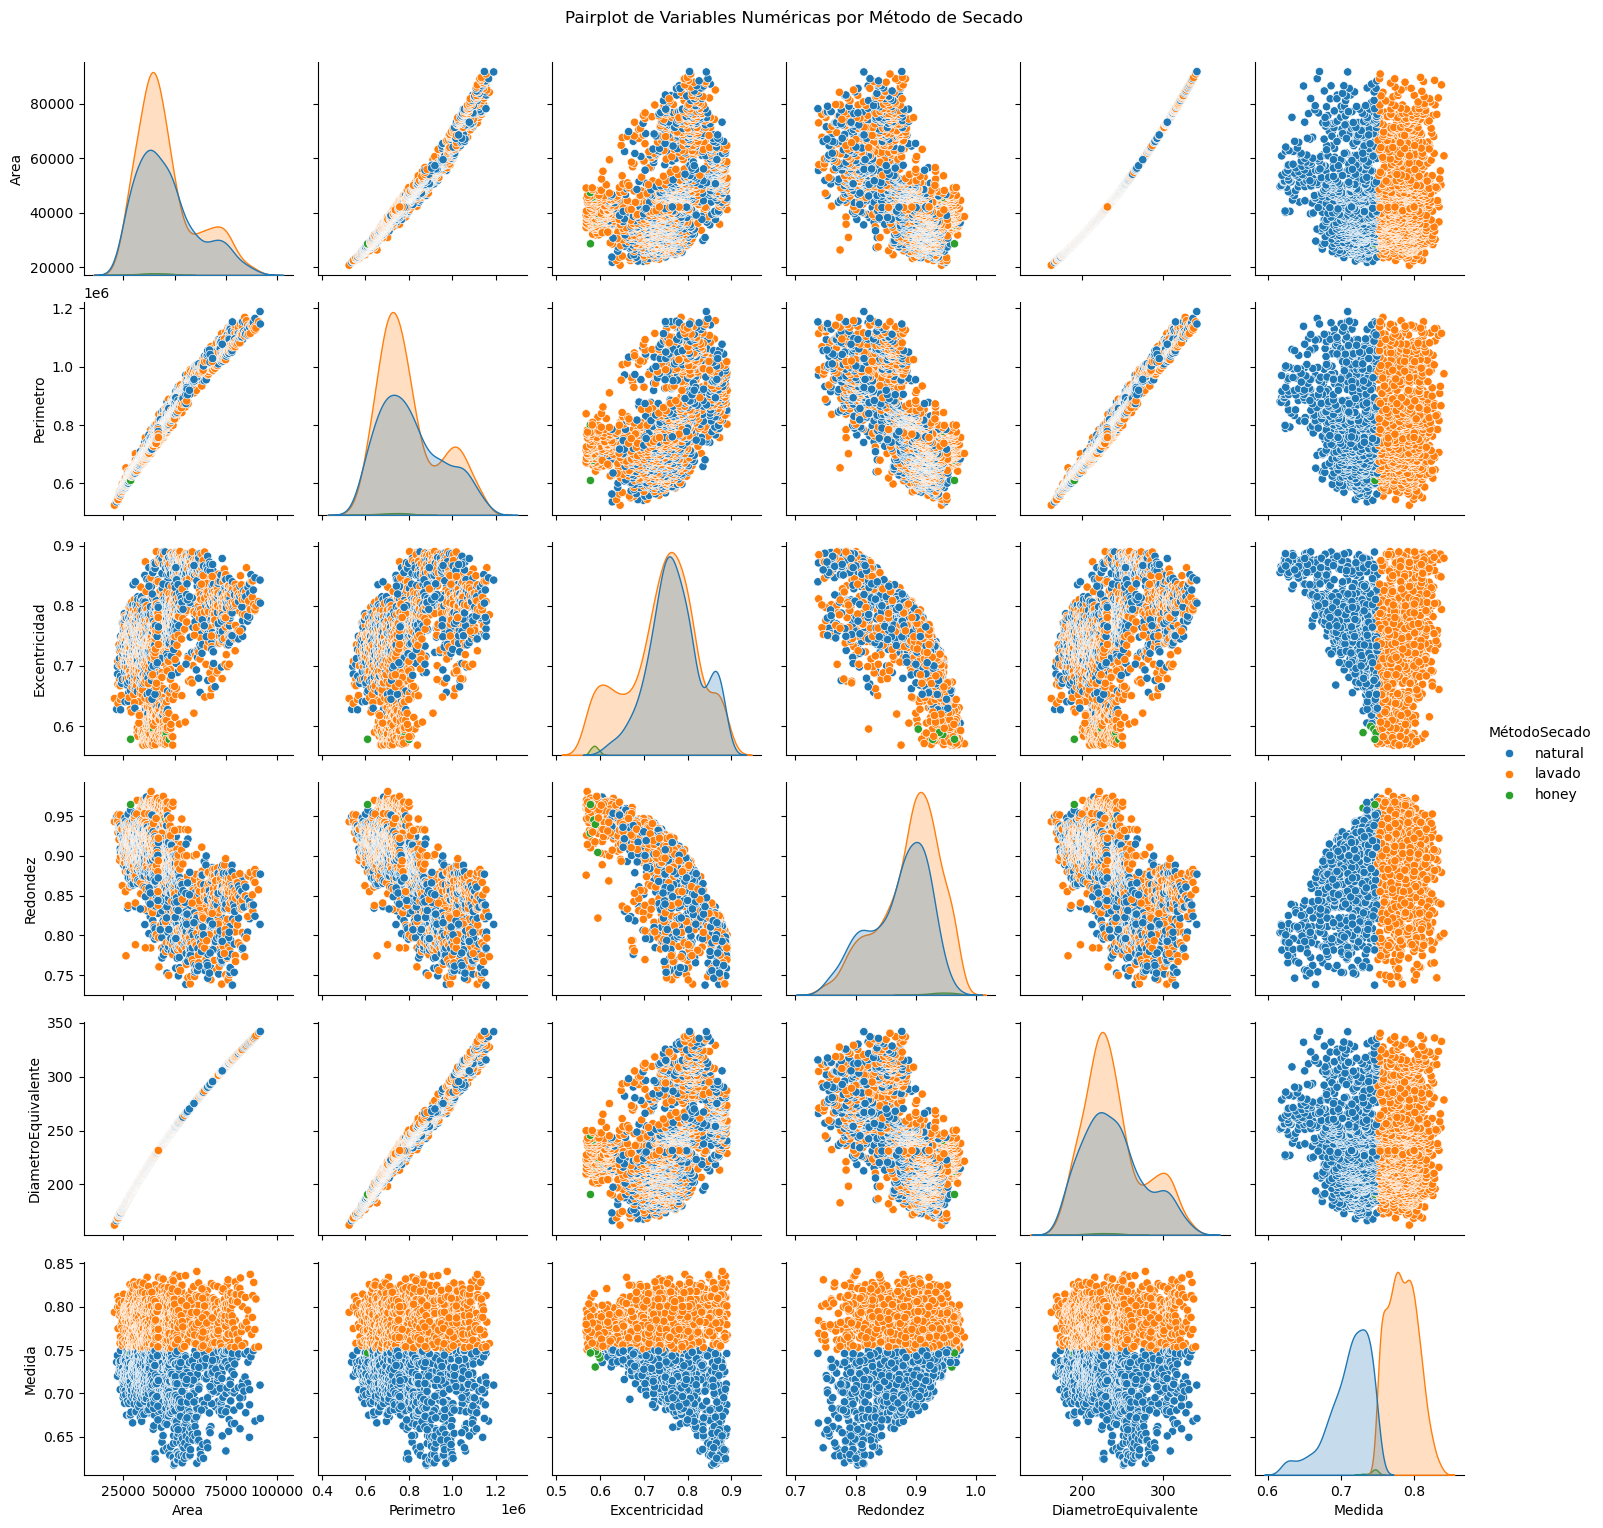

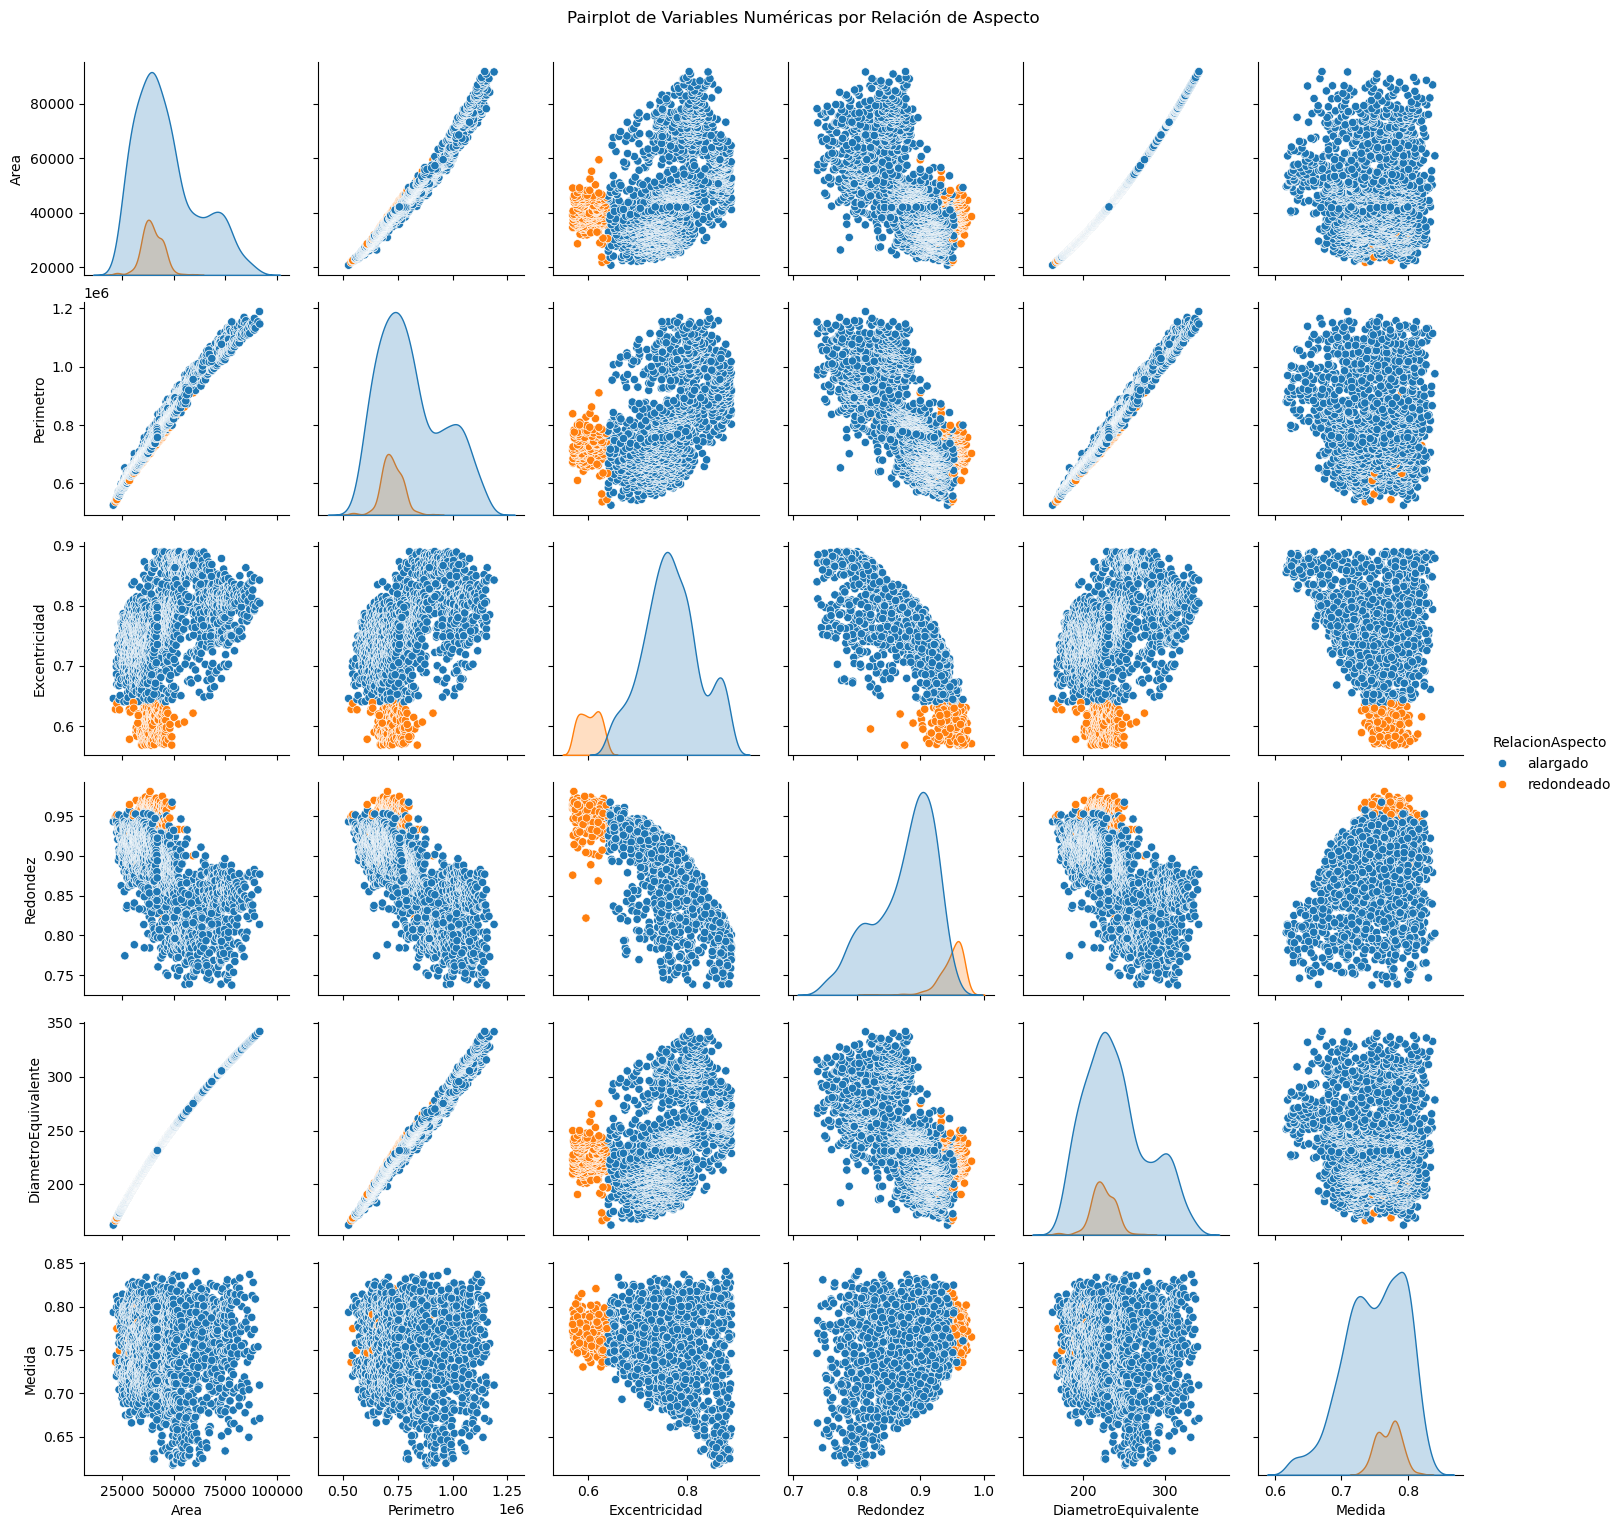

In [15]:
#Selección de variables numéricas para análisis posterior
variables_numericas = ['Area', 'Perimetro', 'Excentricidad', 'Redondez', 'DiametroEquivalente', 'Medida']

#Pairplot (all vs all) por MetodoSecado
sns.pairplot(df, vars=variables_numericas, hue='MétodoSecado', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Método de Secado', y=1.02)
plt.show()

#Pariplot (all vs all) por RelacionAspecto
sns.pairplot(df, vars=variables_numericas, hue='RelacionAspecto', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Relación de Aspecto', y=1.02)
plt.show()

A partir de las visualizaciones gráficas tenemos las siguientes interpretaciones:

- Para una agrupacion por Relación de Aspecto excentricidad y redondez separan bien las dos categorías. Se esperan dos grupos claros en el espacio de dicha variable.
- Hay variables redundantes: Área, Perímetro y Diámetro equivalente se asemejan bastante, se pueden seleccionar solo algunas variables para no sesgar las distancias.
- Para una agrupación por Método de Secado, con morfología hay mucha superposición. 'Medida' muestra una separación parcial, por tanto, si queremos que el modelo recupere los métodos de secado, es necesario incluir esta variable.

Se realizarán las mismas gráficas pero esta vez para las variables númericas:

- FactorForma1
- FactorForma2
- FactorForma3
- FactorForma4

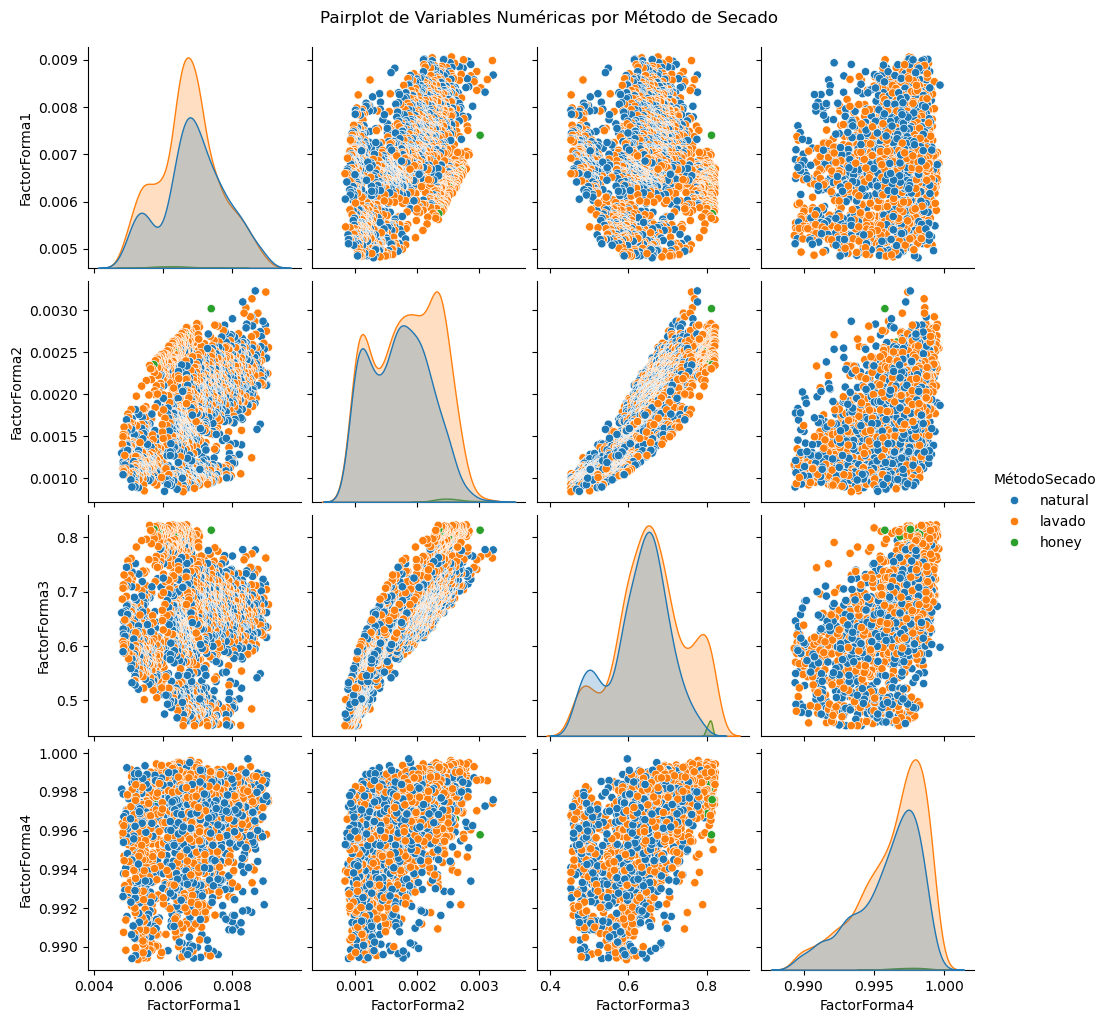

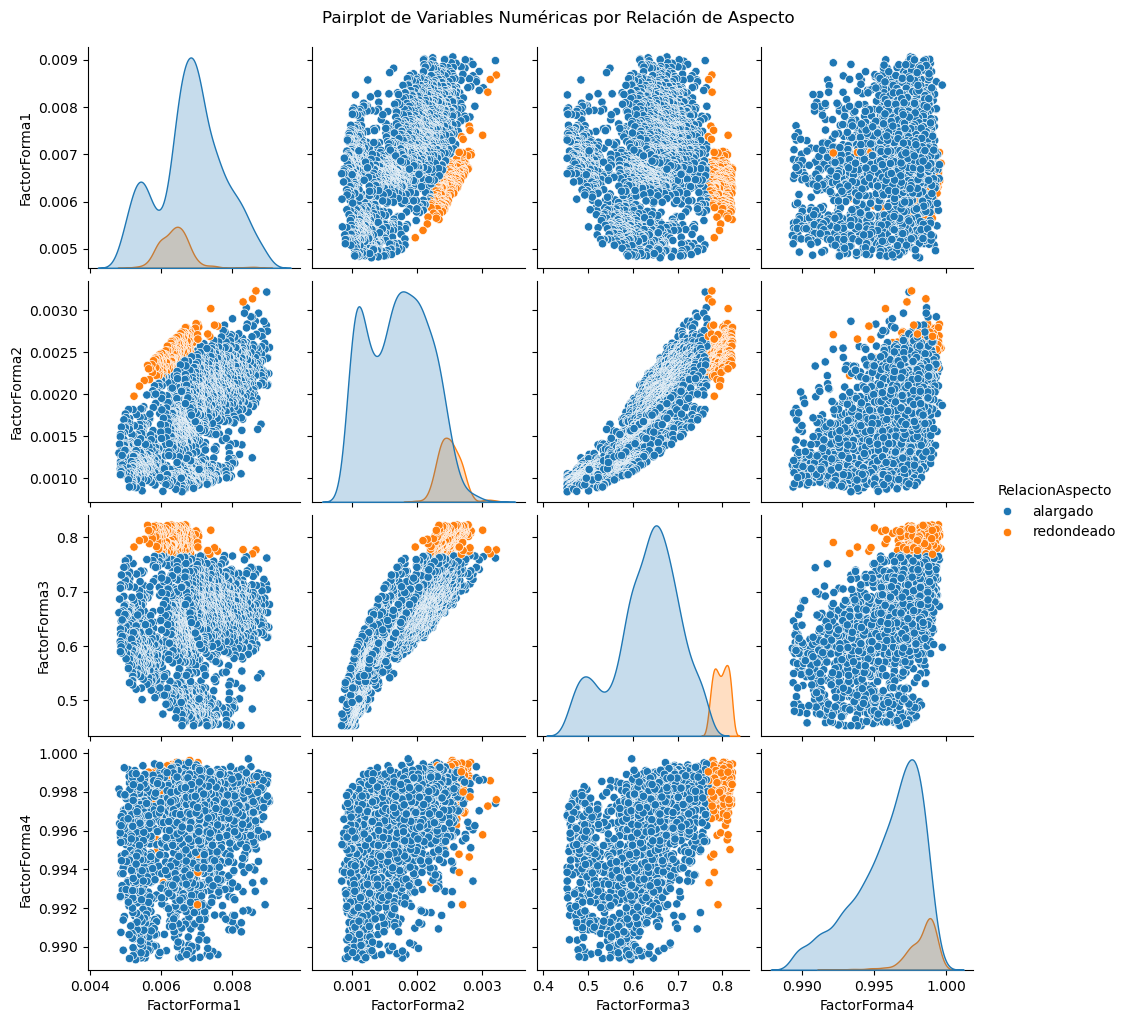

In [16]:
#Selección de variables numéricas para análisis posterior
variables_numericas = ['FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']

#Pairplot (all vs all) por MetodoSecado
sns.pairplot(df, vars=variables_numericas, hue='MétodoSecado', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Método de Secado', y=1.02)
plt.show()

#Pariplot (all vs all) por RelacionAspecto
sns.pairplot(df, vars=variables_numericas, hue='RelacionAspecto', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Relación de Aspecto', y=1.02)
plt.show()


- Los Factores de Forma (1–3) sí separan la Relación de Aspecto (alargado vs redondeado), en especial FF3 (y FF2).

- Los métodos de secado no muestran separación clara en estos factores: si el objetivo fuera encontrar grupos por secado, estos 4 factores no parecen útiles.

- Para considerar en la selección de variables:

    - Mantener: FF1, FF2, FF3.

    - Descartar: FF4, dado que hay varianza casi nula.

- Hay la colinealidad entre FF2 y FF3, para un algoritmo como K-means, esto puede sobreestimar la importancia de esa dimensión. Para K-means se conservará solo una variable.

- Qué esperar de los clusters:

    - Con estas variables, lo más natural es que salgan dos grupos grandes alineados con alargado y redondeado.


Se realizarán las visualizaciones gráficas para las variables numericas faltantes:

- LongitudEjeMayor
- LongitudEjeMenor
- ÁreaConvexa
- Compacidad
- Solidez

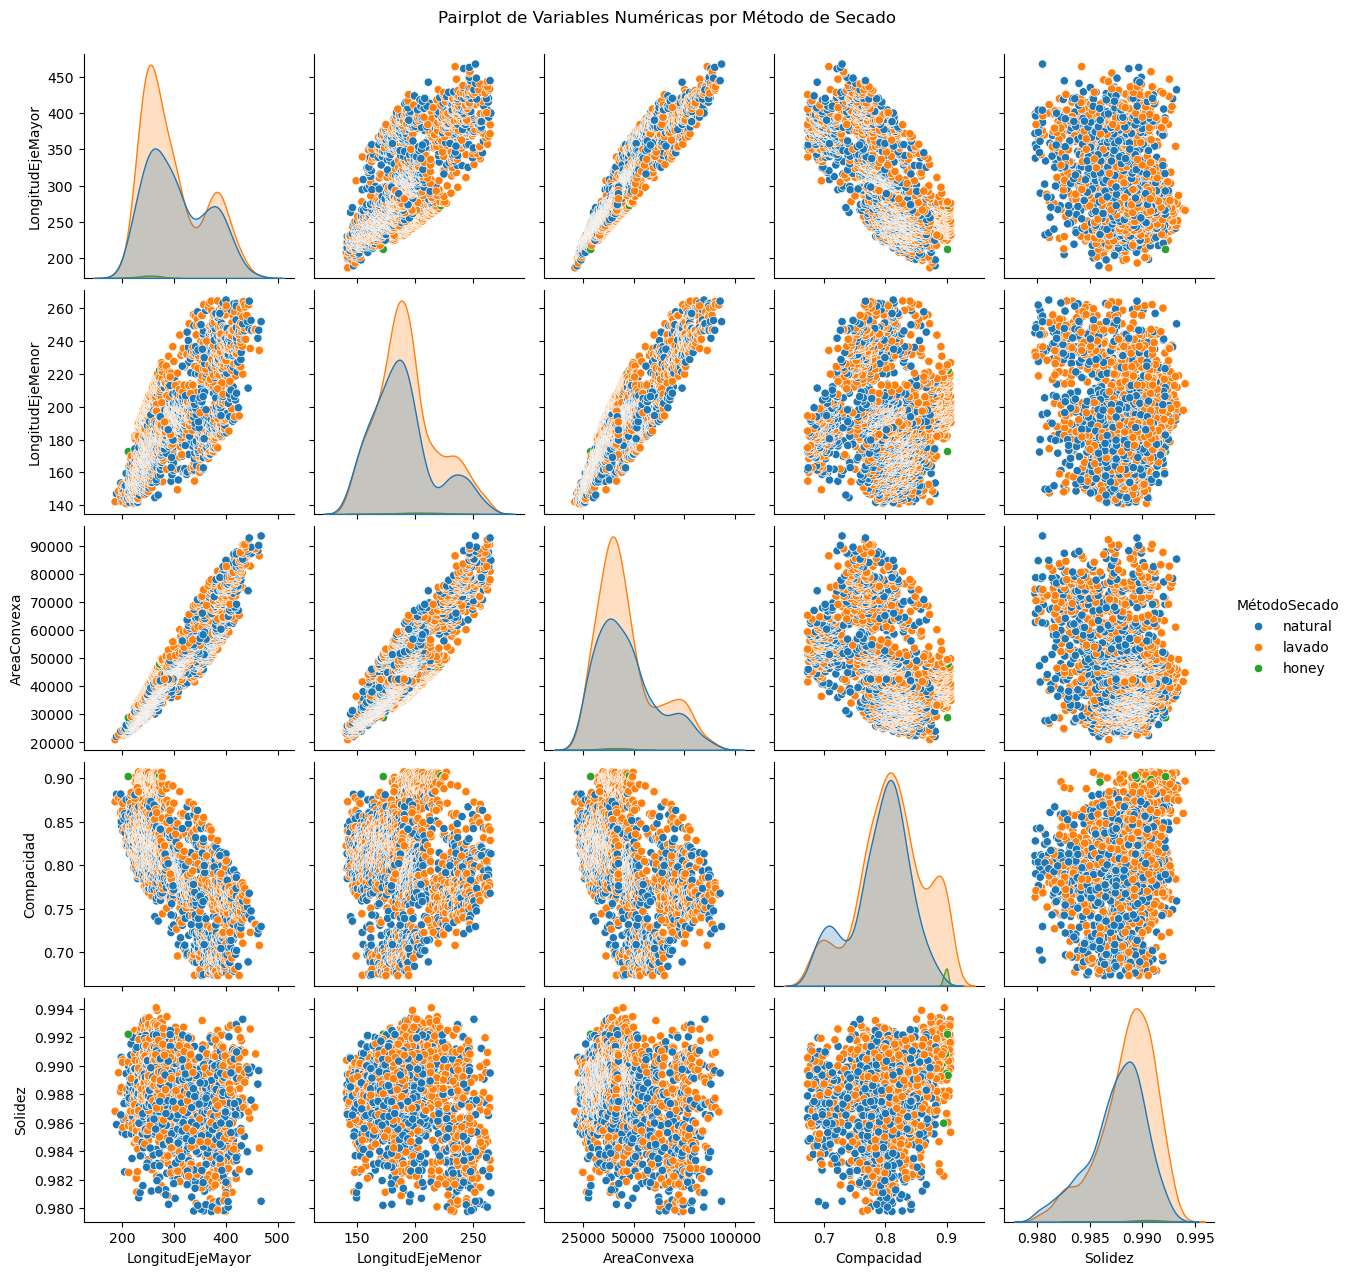

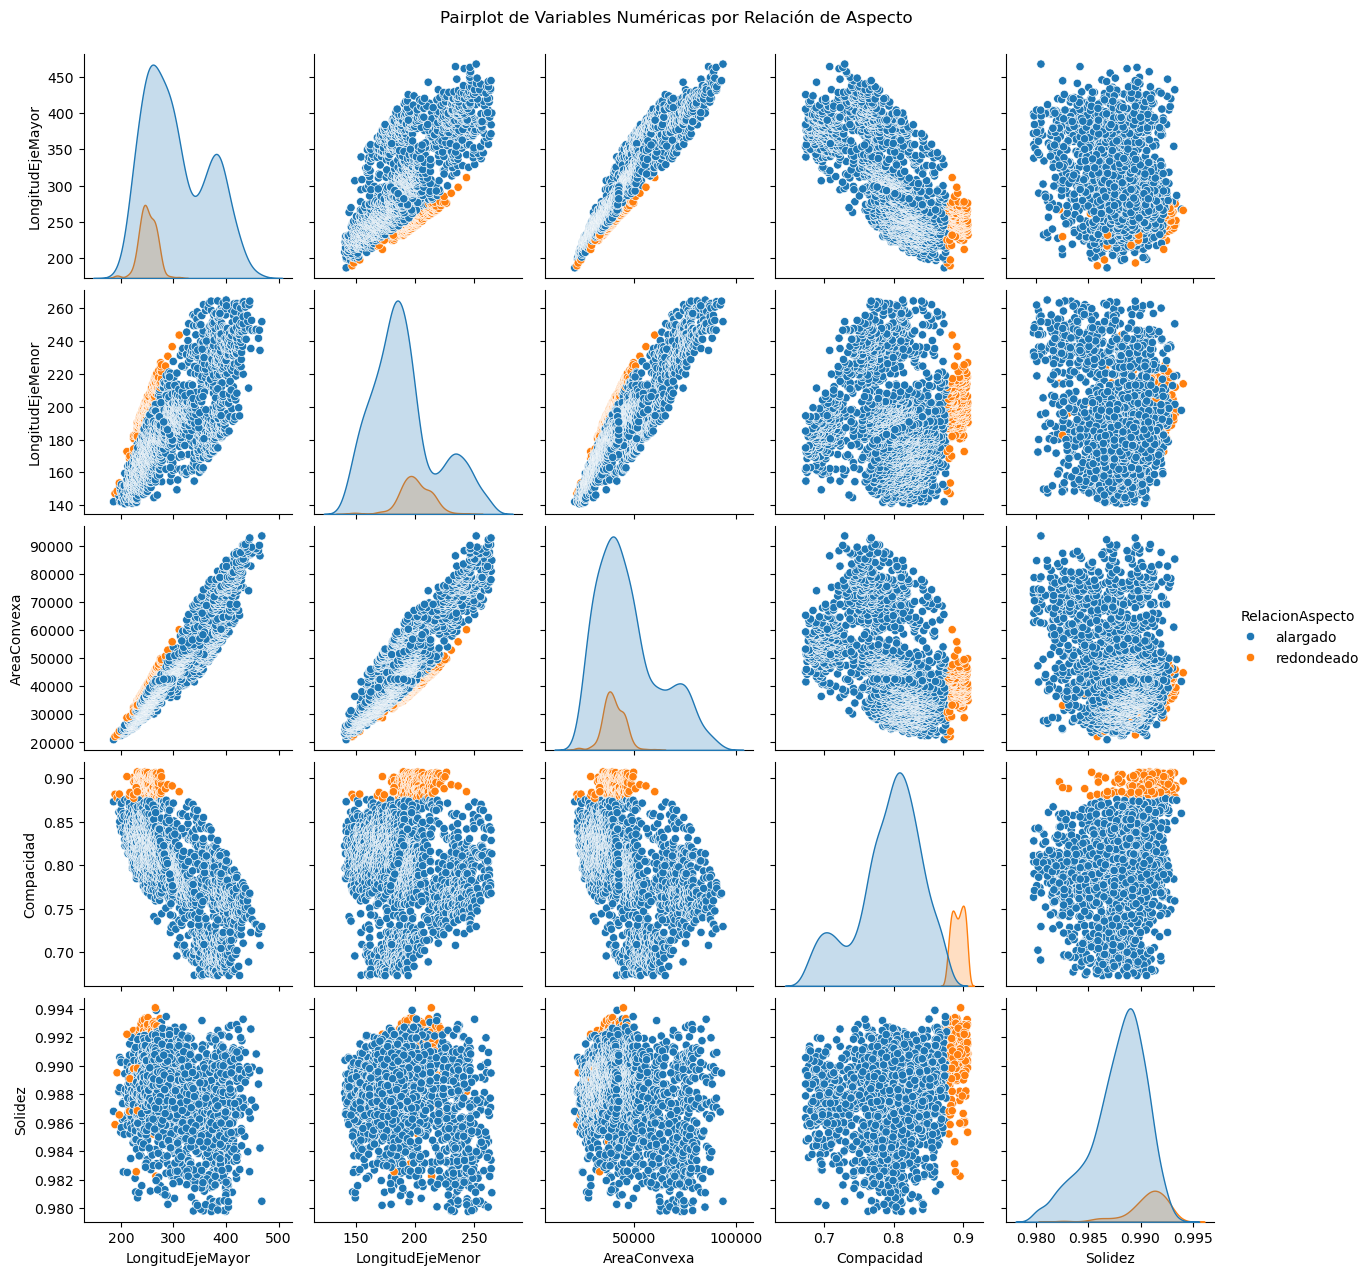

In [17]:
#Selección de variables numéricas para análisis posterior
variables_numericas = ['LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'Compacidad', 'Solidez']

#Pairplot (all vs all) por MetodoSecado
sns.pairplot(df, vars=variables_numericas, hue='MétodoSecado', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Método de Secado', y=1.02)
plt.show()

#Pariplot (all vs all) por RelacionAspecto
sns.pairplot(df, vars=variables_numericas, hue='RelacionAspecto', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Relación de Aspecto', y=1.02)
plt.show()

Para Método de secado: 

- De las numéricas, Solidez es candidata a descartar por baja varianza.

- Por la colinealidad entre ÁreaConvexa y las longitudes, para K-means puede resultar conveniente quedarse con una sola variable.

Para Relación de Aspecto:

- Los granos redondeados se concentran en valores más bajos de LongitudEjeMayor/Menor y ÁreaConvexa y muestran valores más altos de Compacidad.

- Los alargados ocupan el rango mayor de longitudes/área y tienden a menor compacidad.

- Solidez vuelve a tener poca variación.

## Ingeniería de Características

Con las interpretaciones anteriores, se prepararán los datos para los algoritmos de agrupación considerando las siguientes variables:

- Área
- FactorForma1
- FactorForma2
- FactorForma3
- Medida
- Excentricidad
- Redondez
- MétodoSecado
- RelaciónAspecto

Se codificarán las variables categóricas (con OneHotEncoder) y se normalizarán las variables numéricas.

In [18]:
from sklearn.preprocessing import StandardScaler

features = ['Area', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'Medida', 'Excentricidad', 'Redondez', 'MétodoSecado', 'RelacionAspecto']

df_features = df[features].copy()

# Codificación de variables categóricas
df_features = pd.get_dummies(df_features, columns=['MétodoSecado', 'RelacionAspecto'], drop_first=True)
print("Datos codificados:")
display(df_features.head())

# Estandarización de variables numéricas
variables_numericas = ['Area', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'Medida', 'Excentricidad', 'Redondez']

scaler = StandardScaler()
df_features[variables_numericas] = scaler.fit_transform(df_features[variables_numericas])
print("Datos estandarizados:")
display(df_features.head())

Datos codificados:


Area  FactorForma1  FactorForma2  FactorForma3    Medida  \
24  31675.0      0.007474      0.002387      0.719510  0.740936   
29  31811.0      0.007041      0.002831      0.807329  0.773877   
32  31837.0      0.007065      0.002798      0.801336  0.785246   
38  32026.0      0.007212      0.002599      0.764307  0.779449   
43  32109.0      0.006991      0.002839      0.811355  0.767625   

    Excentricidad  Redondez  MétodoSecado_lavado  MétodoSecado_natural  \
24       0.690678  0.920929                False                  True   
29       0.589565  0.969600                 True                 False   
32       0.596968  0.928538                 True                 False   
38       0.642831  0.940248                 True                 False   
43       0.583081  0.916321                 True                 False   

    RelacionAspecto_redondeado  
24                       False  
29                        True  
32                        True  
38                       False  
43                        True

Datos estandarizados:


Area  FactorForma1  FactorForma2  FactorForma3    Medida  \
24 -0.965060      0.743267      1.191342      0.874805 -0.262547   
29 -0.955826      0.264772      2.067641      1.924737  0.496887   
32 -0.954060      0.290605      2.003286      1.853086  0.758973   
38 -0.941227      0.453739      1.609724      1.410371  0.625337   
43 -0.935591      0.209383      2.083304      1.972871  0.352755   

    Excentricidad  Redondez  MétodoSecado_lavado  MétodoSecado_natural  \
24      -0.855107  0.766919                False                  True   
29      -2.243850  1.728388                 True                 False   
32      -2.142168  0.917226                 True                 False   
38      -1.512265  1.148552                 True                 False   
43      -2.332905  0.675883                 True                 False   

    RelacionAspecto_redondeado  
24                       False  
29                        True  
32                        True  
38                       False  
43                        True

# 2. Modelamiento

## Algoritmo K-means - Implementado por Juan Miguel Manrique

A continuación se muestra una implementación del algoritmo K-means para clustering.

- Objetivo: segmentar granos por morfología para estandarizar procesos y apoyar control de calidad y mezclas.

- Naturaleza de los datos: variables numéricas con relaciones aproximadamente continuas; volumen medio, entre 2000-3000 registros.

- K-means usa distancia euclídea y busca grupos compactos. Es rápido, estable y fácil de explicar al negocio. Para este primer corte, priorizamos claridad y velocidad sobre modelos más complejos.

- Features usados: mezcla de numéricos estandarizados y categóricos en one-hot (0/1) sin escalar.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on

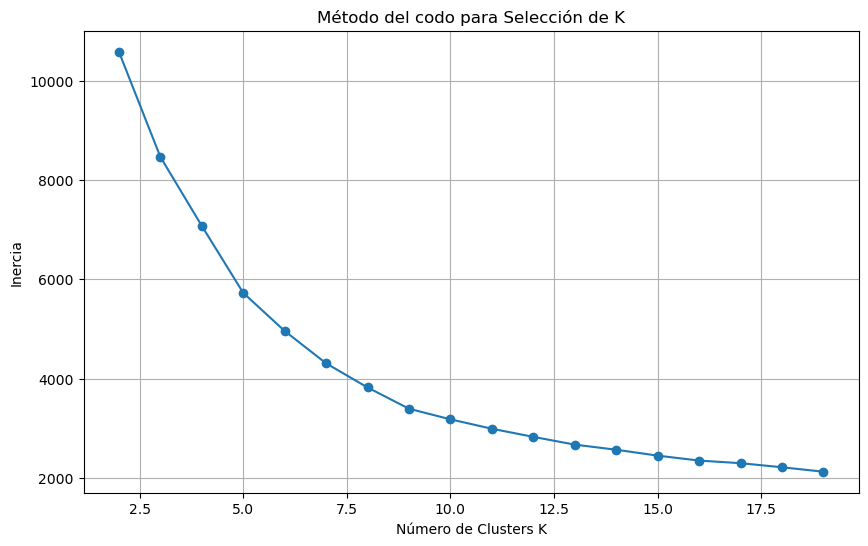

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on

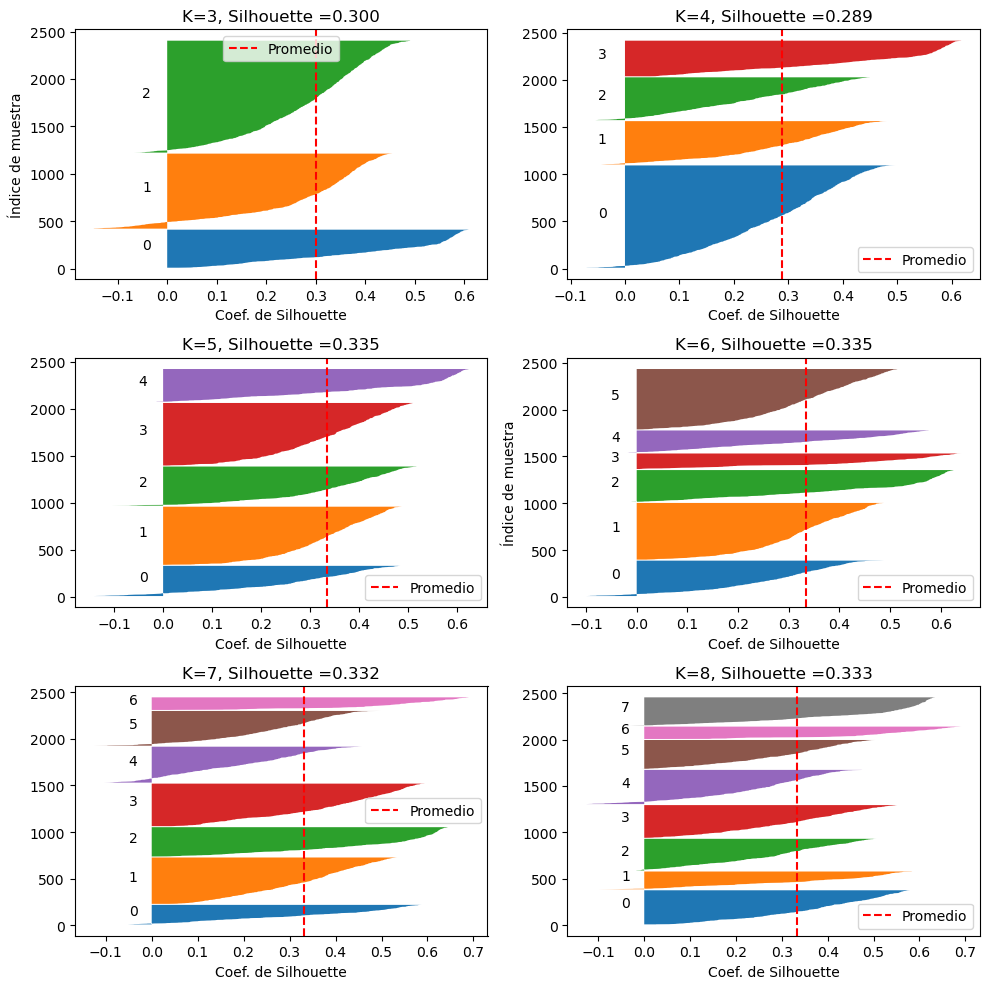

Clusters asignados por K-means (primeras filas):


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Area  FactorForma1  FactorForma2  FactorForma3    Medida  \
24  31675.0      0.007474      0.002387      0.719510  0.740936   
29  31811.0      0.007041      0.002831      0.807329  0.773877   
32  31837.0      0.007065      0.002798      0.801336  0.785246   
38  32026.0      0.007212      0.002599      0.764307  0.779449   
43  32109.0      0.006991      0.002839      0.811355  0.767625   

    Excentricidad  Redondez MétodoSecado RelacionAspecto  Cluster  
24       0.690678  0.920929      natural        alargado        1  
29       0.589565  0.969600       lavado      redondeado        2  
32       0.596968  0.928538       lavado      redondeado        2  
38       0.642831  0.940248       lavado        alargado        2  
43       0.583081  0.916321       lavado      redondeado        2

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Utilizar dataframe limpio y preprocesado
inertias = []
K_range = range(2, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_features)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.title('Método del codo para Selección de K')
plt.xlabel('Número de Clusters K')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

K_optimal = 6  # Seleccionado basado en el gráfico del codo

# Definir los valores de K a analizar (asegurando que no sean menores a 2)
K_valores = [k for k in range(K_optimal - 3, K_optimal + 3) if k >= 2]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for idx, k in enumerate(K_valores):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_features)
    
    silhouette_avg = silhouette_score(df_features, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_features, cluster_labels)
    
    ax = axes[idx]
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters
    
    ax.set_title(f'K={k}, Silhouette ={silhouette_avg:.3f}')
    ax.set_xlabel('Coef. de Silhouette')
    ax.set_ylabel("Índice de muestra" if idx in [0,3] else "")
    ax.axvline(x=silhouette_avg, color='red', linestyle='--', label='Promedio')
    ax.legend()
    
# Si hay menos de 6 K posibles, eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

K_optimal = 6  # Seleccionado basado en el gráfico del codo y análisis de silhouette
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df_features)
print("Clusters asignados por K-means (primeras filas):")
display(df[['Area', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'Medida', 'Excentricidad', 'Redondez', 'MétodoSecado', 'RelacionAspecto', 'Cluster']].head())

Para la selección de un $K$ óptimo se hizo uso de los siguientes métodos:
- Método del codo: la inercia cae rápido y el cambio de pendiente se suaviza alrededor de 𝐾≈6.
- Coeficientes de silueta: comparamos $K$ en el entorno del codo. Los promedios oscilaron entre 0.30-0.34. con pico en $K = 5-6$ y perfiles sin colas negativas pronunciadas.

Como decisión, se mantiene el número de clusters como $K = 6$, puesto que equilibra la compacidad, separación y tamaño de grupos. Además, se evitan los clusters muy pequeños al subir el $K$.

Hiperparámetros y configuración del modelo:

- n_clusters=6 – seleccionado por codo y silueta.

- n_init=10 – robustez: re-lanzamos con 10 semillas y elegimos la mejor.

- random_state=42 – mejora la reproducibilidad.

Los resultados muestran un coeficiente de silueta de 0.33 para $K = 6$. Esto es una calidad moderada, hay cierta estructura en la agrupación, pero se presentan zonas de solapamiento. Es razonable puesto que varias variables están correlacionadas y las transiciones de forma son graduales. Dado esto, los clusters pueden resultar de utilidad para una segmentación operativa, pero no para establecer reglas rígidas sin antes revisar las tolerancias del negocio.

Los clusters se diferencian principalmente por tamaño. Combinaciones de las variables Medida, Excentricidad y Redondez separan granos más redondeados contra otro más alargados.

El método de secado no explica por si solo los grupos, lo cual sugiere que la morfología resultante no es efecto de un único método.

Por otro lado, la relación de aspecto sí se alinea parcialmente con clusters de alta Redondez y baja Excentricidad. Esto puede ser útil al momento de estandarizar especificaciones.

## Algoritmo 2 - Implementado por Andrés Felipe Gómez García  

## Algoritmo 3 - DBSCAN - Implementado por Sebastian Contreras Salazar  

Se escogío el algoritmo de DBSCAN (Density Based Spatial Clustering of Applications with Noise). Este es un algoritmo de clústeres por densidad, el cual agrupa puntos que están lo suficientemente cerca entre sí (zonas densas) y marca como ruido a los puntos aislados. A diferencia de K-means, no necesita fijar el número de clústeres y puede encontrar formas no esféricas.


### Algunos conceptos clave:

* **Vecindad ε (`eps`)**: radio que define si dos puntos son “vecinos”.
* **`min_samples`**: mínimo de puntos (incluyendo el punto central) que debe haber dentro de `eps` para considerar que hay alta densidad.
* **Punto núcleo (core)**: tiene ≥ `min_samples` vecinos dentro de `eps`.
* **Punto frontera (border)**: está dentro de `eps` de algún núcleo, pero no alcanza `min_samples` por sí solo.
* **Ruido (outlier)**: no es núcleo ni frontera; se etiqueta con −1.

**Intuición:** DBSCAN “enciende” un clúster allí donde encuentra un punto núcleo; luego expande el clúster conectando núcleos y agregando fronteras alcanzables. Lo que no se conecta queda como ruido.

### Hiperparámetros del algoritmo (y cómo elegirlos)

* **`eps` (ε)**: qué tan “cerca” deben estar los puntos.
  **Cómo escogerlo:** usa la k-distance curve (distancia al k-ésimo vecino con k = `min_samples`). Ordena esas distancias y busca el “codo”.
* **`min_samples`**: cuántos vecinos mínimos definen “densidad”.
  **Reglas prácticas:** 5–10 para datos tabulares típicos; otra heurística es `≈ 2 * (n_features)` si la dimensión es baja.


| Parámetro     |      Valor | Cómo se eligió                       | Efecto al aumentar                                | Efecto al disminuir                                     |
| ------------- | ---------: | ------------------------------------ | ------------------------------------------------- | ------------------------------------------------------- |
| `min_samples` |         10 | Regla práctica (5–10)                | Más densidad exigida → menos clústeres, más ruido | Menos densidad → más clústeres, riesgo de fragmentación |
| `eps`         |     0.8276 | k-distance (k=10) + mejor silhouette | Fusión de clústeres, menos ruido                  | Más ruido, clústeres fragmentados                       |
| `metric`      | euclidiana | Estándar tras z-score                | —                                                 | —                                                       |
| `algorithm`   |       auto | Elegido por sklearn                  | —                                                 | —                                                       |

### Métricas de evaluación (intrínsecas)

* **Silhouette (↑ mejor)**: calcular solo con puntos no ruido y si hay ≥ 2 clústeres.
* **Calinski–Harabasz (↑ mejor)** y **Davies–Bouldin (↓ mejor)**: también sobre puntos no ruido.
* **# de clústeres** y **% de ruido**: ayudan a interpretar estructura y “limpieza” de los datos.

### ¿Cuándo usar DBSCAN?

DBSCAN es mejor usarlo cuando se cumplen estos parámetros:

* No conoces el número de clústeres de antemano.
* Los clústeres pueden tener formas arbitrarias (no esferas).
* Necesitas detectar outliers explícitamente.
* Esperas densidades similares entre clústeres.


### Ventajas de usarlo

* Sin k: no exige fijar el número de clústeres.
* Detecta outliers de forma natural.
* Encuentra formas complejas de clúster.
* Estable (no depende de inicialización de centroides).

### Desventajas de usarlo

* Escala: requiere estandarizar.
* Densidades distintas entre clústeres → puede fusionar o fragmentar grupos.
* En alta dimensión, la distancia euclidiana se degrada.
* Elegir `eps`/`min_samples` requiere inspección (k-distance + validación).


### Buenas prácticas de implementación para el algoritmo

1. **Preprocesamiento**:

   * Estandariza numéricas (z-score).
   * One-hot para categóricas (`drop_first=True`).
   * Quita columnas no informativas (IDs, constantes).
2. **Selección de hiperparámetros**:

   * Fijar `min_samples` (p. ej., 10) y calcular la k-distance curve para proponer `eps`.
   * Probar 2–3 valores alrededor del codo y elegir el mejor por Silhouette (sin ruido).
3. **Validación**:

   * Reporta número de clústeres, % de ruido, Silhouette/CH/DBI.
   * Visualiza en 2D con PCA para interpretar separación y outliers.
4. **Si hay problemas**:

   * Mucho ruido → aumentar `eps` o reducir `min_samples`.
   * Fusión de clústeres → reducir `eps` o aumentar `min_samples`.
   * Densidad muy desigual → probar HDBSCAN o segmentar por subpoblaciones.





In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

assert 'df' in globals(), "Falta df. Ejecuta las celdas de carga y limpieza."
assert 'df_features' in globals(), "Falta df_features. Ejecuta las celdas de preparación (dummies + escala)."

X = df_features.values
n, d = X.shape

min_samples = 10                     
k = min_samples

nn = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(X)
distances, _ = nn.kneighbors(X)
k_dist = np.sort(distances[:, -1])

quantiles = [0.85, 0.90, 0.95]
eps_candidates = np.unique(np.quantile(k_dist, quantiles))

def fit_and_score(eps):
    model = DBSCAN(eps=float(eps), min_samples=min_samples, metric='euclidean')
    labels = model.fit_predict(X)
    mask = labels != -1                 
    sil = np.nan
    ncl = len(set(labels[mask]))
    if mask.sum() > 1 and ncl >= 2:
        sil = silhouette_score(X[mask], labels[mask], metric='euclidean')
    return model, labels, sil

probes = []
for e in eps_candidates:
    mdl, lbl, sil = fit_and_score(e)
    probes.append({"eps": float(e), "silhouette_no_noise": sil, "labels": lbl, "model": mdl})

valid = [p for p in probes if not np.isnan(p["silhouette_no_noise"])]
best = max(valid, key=lambda p: p["silhouette_no_noise"]) if valid else probes[len(probes)//2]

dbscan_model   = best["model"]
dbscan_labels  = best["labels"]
dbscan_params  = {"eps": best["eps"], "min_samples": min_samples}


df["Cluster_DBSCAN"] = dbscan_labels

# Resultados rápidos
mask = dbscan_labels != -1
n_clusters = len(set(dbscan_labels[mask]))
pct_noise   = (np.sum(dbscan_labels == -1) / len(dbscan_labels)) * 100
print(f"[DBSCAN] eps={dbscan_params['eps']:.4f}, min_samples={min_samples}")
print(f"[DBSCAN] clusters={n_clusters} | ruido={pct_noise:.1f}%")


[DBSCAN] eps=0.8276, min_samples=10
[DBSCAN] clusters=3 | ruido=5.3%


Ahora para ver los resultados: 


=== Métricas DBSCAN (no-ruido) ===


Modelo  n_clusters  pct_ruido  silhouette_sin_ruido  calinski_harabasz  \
0  DBSCAN           3   5.347368              0.216962         540.465659   

   davies_bouldin       eps  min_samples  
0        1.490816  0.827586           10


=== Tabla comparativa (acumulada) ===


Modelo  n_clusters  pct_ruido  silhouette_sin_ruido  calinski_harabasz  \
0  DBSCAN           3   5.347368              0.216962         540.465659   

   davies_bouldin       eps  min_samples  
0        1.490816  0.827586           10

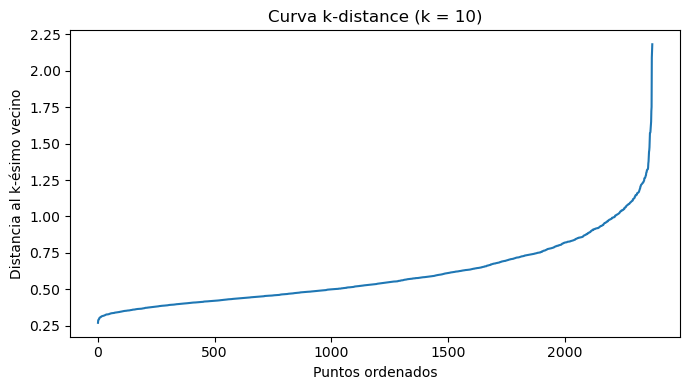

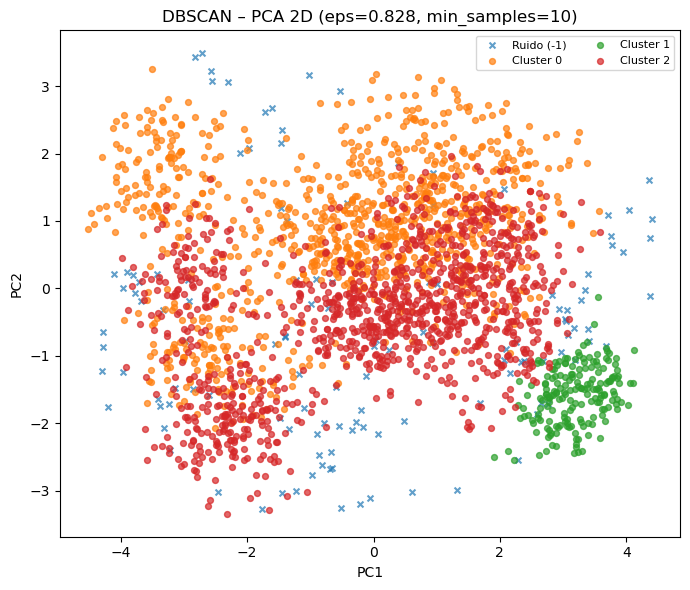

=== Perfil de clústeres (numéricas originales) ===


Area                     FactorForma1                  \
                        mean           std count         mean       std count   
Cluster_DBSCAN                                                                  
0               45651.571281  14667.937818   968     0.006918  0.000908   968   
1               39786.818182   4355.301683   187     0.006362  0.000349   187   
2               46442.525160  15097.057284  1093     0.006822  0.000892  1093   

               FactorForma2                 FactorForma3  ...          Medida  \
                       mean       std count         mean  ... count      mean   
Cluster_DBSCAN                                            ...                   
0                  0.001708  0.000468   968     0.627076  ...   968  0.711063   
1                  0.002498  0.000153   187     0.797898  ...   187  0.774624   
2                  0.001722  0.000468  1093     0.634006  ...  1093  0.785776   

                               Excentricidad                  Redondez  \
                     std count          mean       std count      mean   
Cluster_DBSCAN                                                           
0               0.028403   968      0.771856  0.054780   968  0.873085   
1               0.014940   187      0.600539  0.019767   187  0.951377   
2               0.020204  1093      0.765877  0.057160  1093  0.882022   

                                
                     std count  
Cluster_DBSCAN                  
0               0.047477   968  
1               0.015320   187  
2               0.045028  1093  

[3 rows x 21 columns]

=== MétodoSecado: distribución por clúster ===


MétodoSecado    lavado  natural
Cluster_DBSCAN                 
0                  0.0      1.0
1                  1.0      0.0
2                  1.0      0.0

=== RelacionAspecto: distribución por clúster ===


RelacionAspecto  alargado  redondeado
Cluster_DBSCAN                       
0                     1.0         0.0
1                     0.0         1.0
2                     1.0         0.0

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels = df["Cluster_DBSCAN"].values
X = df_features.values
mask = labels != -1
have_clusters = (mask.sum() > 1) and (len(set(labels[mask])) >= 2)

# Métricas intrínsecas (sólo clústeres no-ruido)
sil = silhouette_score(X[mask], labels[mask]) if have_clusters else np.nan
ch  = calinski_harabasz_score(X[mask], labels[mask]) if have_clusters else np.nan
dbi = davies_bouldin_score(X[mask], labels[mask])   if have_clusters else np.nan

n_clusters = len(set(labels[mask]))
pct_noise  = (np.sum(labels == -1) / len(labels)) * 100

metrics_row = pd.DataFrame([{
    "Modelo": "DBSCAN",
    "n_clusters": int(n_clusters),
    "pct_ruido": pct_noise,
    "silhouette_sin_ruido": None if np.isnan(sil) else sil,
    "calinski_harabasz": None if np.isnan(ch) else ch,
    "davies_bouldin": None if np.isnan(dbi) else dbi,
    "eps": dbscan_params["eps"],
    "min_samples": dbscan_params["min_samples"]
}])

# Actualizar/crear tabla comparativa
if "resultados_modelos" in globals():
    # armonizar columnas si vienen de otros modelos
    resultados_modelos = pd.concat([resultados_modelos, metrics_row], ignore_index=True).fillna(resultados_modelos if isinstance(resultados_modelos, (pd.DataFrame,)) else 0)
else:
    resultados_modelos = metrics_row.copy()

print("=== Métricas DBSCAN (no-ruido) ===")
display(metrics_row)
print("\n=== Tabla comparativa (acumulada) ===")
display(resultados_modelos)

# 1) Curva k-distance (para documentar la selección de eps)
k = dbscan_params["min_samples"]
nn = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nn.kneighbors(X)
k_dist = np.sort(distances[:, -1])

plt.figure(figsize=(7,4))
plt.plot(k_dist)
plt.title(f"Curva k-distance (k = {k})")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al k-ésimo vecino")
plt.tight_layout()
plt.show()

# 2) Proyección PCA 2D con clústeres y ruido
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X)

plt.figure(figsize=(7,6))
for lab in sorted(set(labels)):
    sel = labels == lab
    if lab == -1:
        plt.scatter(proj[sel,0], proj[sel,1], s=18, marker='x', label="Ruido (-1)", alpha=0.7)
    else:
        plt.scatter(proj[sel,0], proj[sel,1], s=18, label=f"Cluster {lab}", alpha=0.7)
plt.title(f"DBSCAN – PCA 2D (eps={dbscan_params['eps']:.3f}, min_samples={dbscan_params['min_samples']})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

# 3) Perfil de clústeres (promedios de variables originales numéricas)
num_cols = [c for c in ['Area','FactorForma1','FactorForma2','FactorForma3','Medida','Excentricidad','Redondez'] if c in df.columns]
if num_cols:
    perfil = (df.loc[labels!=-1, num_cols + ["Cluster_DBSCAN"]]
                .groupby("Cluster_DBSCAN").agg(["mean","std","count"]))
    print("=== Perfil de clústeres (numéricas originales) ===")
    display(perfil)

# 4) Distribuciones categóricas (si existen en df)
for cat in ["MétodoSecado","RelacionAspecto"]:
    if cat in df.columns:
        print(f"=== {cat}: distribución por clúster ===")
        display(pd.crosstab(df.loc[labels!=-1,"Cluster_DBSCAN"], df.loc[labels!=-1,cat], normalize="index").round(3))


### Resultados
Complemento de resultados (DBSCAN). Con `eps=0.8276` y `min_samples=10`, DBSCAN identificó 3 clústeres con 5.3% de ruido, lo que sugiere un conjunto mayoritariamente consistente para fines de control de calidad y trazabilidad. Los clústeres no-ruido suman aproximadamente 2.248 granos (≈968 en C0, ≈187 en C1, ≈1.093 en C2). Por otro lado, C1 es un grupo compacto y diferenciado de granos más redondeados (redondez ≈0.95, excentricidad ≈0.60) y menor área (≈39,8k), mientras C0 y C2 son alargados pero se distinguen por tamaño/medida (C0 con medida ≈0.71; C2 ≈0.79 y área algo mayor). 

La `silhouette=0.217` (CH=540.47 y DBI=1.49) evidencia separación parcial: un perfil morfológico (redondeado) y dos perfiles alargados con solapamiento. 

Para SenecaféAlpes, esto permite:
- Definir reglas de clasificación por rangos de redondez, excentricidad y área para estandarizar la clasificación
- Diseñar mezclas con proporciones de alargado-menor, alargado-mayor y redondeado para perfiles consistentes 
- Establecer una base de trazabilidad automática dado el bajo porcentaje de ruido (el % de ruido bajo sugiere que un clasificador puede operar con pocas excepciones). 

Ahora bien, para mejorar la separación entre los dos grupos alargados y subir silhouette, se debería reentrenar usando solo variables morfológicas numéricas (excluir `MétodoSecado` y `RelacionAspecto` del fit para no forzar la segmentación), refinar `eps` con la k-distance y probar `min_samples` en [5,10,15], evaluar un PCA previo (5–8 PCs) y tratar outliers/valores fuera de rango antes del modelado.Finalmente, comparar estas métricas con K-means y el segundo algoritmo para escoger el que entregue grupos más nítidos y útiles para el negocio.


# 3. Validación cuantitativa

# 4. Validación cualitativa